In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier


In [10]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X,y)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('lr',model1),('qda',model2),('gnb',model3),('rfc',model4),('tree',model5)],
                           voting='soft',weights=[1,2,1,1,1])
ensemble_model = ensemble.fit(X,y)

y_pred = ensemble_model.predict(X)

from sklearn.model_selection import cross_val_score, KFold

cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(ensemble_model, X, y, scoring='accuracy', cv=cv).mean()

0.9666666666666666

## 배깅

앞서 모형 결합에서 사용하는 독립적인 모형의 수가 많을 수록 성능 향상이 일어날 가능성이 높다는 것을 알았다. 각각 다른 확률 모형을 사용하는데에는 한계가 있으므로 보통은 배깅 방법을 사용하여 같은 확률 모형을 쓰지만 서로 다른 결과를 출력하는 다수의 모형을 만든다.


배깅(bagging)은 동일한 모형과 모형 모수를 사용하는 대신 부트스트래핑(bootstrapping)과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용한다.

트레이닝 데이터를 선택하는 방법에 따라 다음과 같이 부르기도 한다.

- 같은 데이터 샘플을 중복사용(replacement)하지 않으면: Pasting

- 같은 데이터 샘플을 중복사용(replacement)하면 Bagging

- 데이터가 아니라 다차원 독립 변수 중 일부 차원을 선택하는 경우에는: Random Subspaces


데이터 샘플과 독립 변수 차원 모두 일부만 랜덤하게 사용하면: Random Patches
성능 평가시에는 트레이닝용으로 선택한 데이터가 아닌 다른 데이터를 사용할 수도 있다. 이런 데이터를 OOB(out-of-bag) 데이터라고 한다.

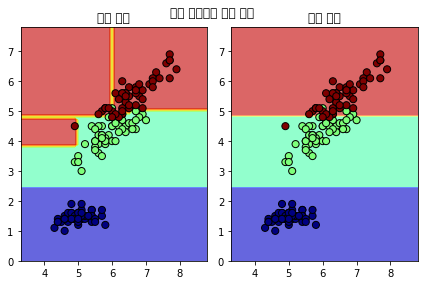

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
 
warnings.filterwarnings("ignore")
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

In [ ]:
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

In [18]:
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=10)
mpdel2 = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring='accuracy',cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring='accuracy',cv=cv)

accuracy1.mean(), accuracy1.std(),accuracy2.mean(), accuracy2.std()

(0.9133333333333334,
 0.02666666666666666,
 0.9333333333333333,
 0.04216370213557838)

In [21]:
model1 = RandomForestClassifier(max_depth=2)
mpdel2 = BaggingClassifier(RandomForestClassifier(max_depth=2), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring='accuracy',cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring='accuracy',cv=cv)

accuracy1.mean(), accuracy1.std(),accuracy2.mean(), accuracy2.std()

(0.9066666666666666,
 0.038873012632301994,
 0.9333333333333333,
 0.04216370213557838)

## 랜덤포레스트

랜덤포레스트(Random Forest)는 의사 결정 나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법을 말한다.

랜덤포레스트는 데이터 특징차원의 일부만 선택하여 사용한다. 하지만 노드 분리시 모든 독립 변수들을 비교하여 최선의 독립 변수를 선택하는 것이 아니라 독립 변수 차원을 랜덤하게 감소시킨 다음 그 중에서 독립 변수를 선택한다. 이렇게 하면 개별 모형들 사이의 상관관계가 줄어들기 때문에 모형 성능의 변동이 감소하는 효과가 있다.

이러한 방법을 극단적으로 적용한 것이 Extremely Randomized Trees 모형으로 이 경우에는 각 노드에서 랜덤하게 독립 변수를 선택한다.

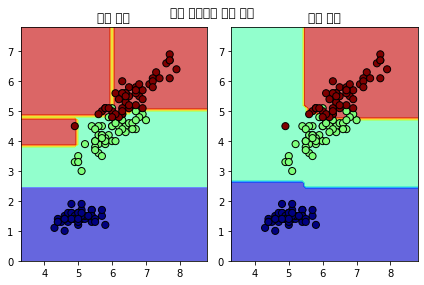

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

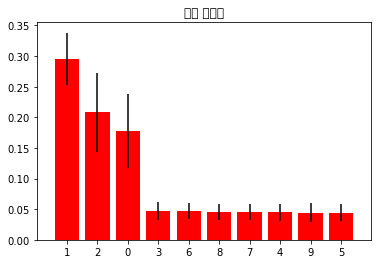

In [23]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title("특성 중요도")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
from sklearn.datasets import breastcancer
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title("특성 중요도")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

ImportError: cannot import name 'breastcancer' from 'sklearn.datasets' (C:\Users\82109\anaconda3\lib\site-packages\sklearn\datasets\__init__.py)

In [30]:
forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X,y)
accuracy = cross_val_score(forest, X, y, scoring='accuracy', cv=cv)
accuracy.mean(), accuracy.std()

(0.931, 0.014628738838327755)

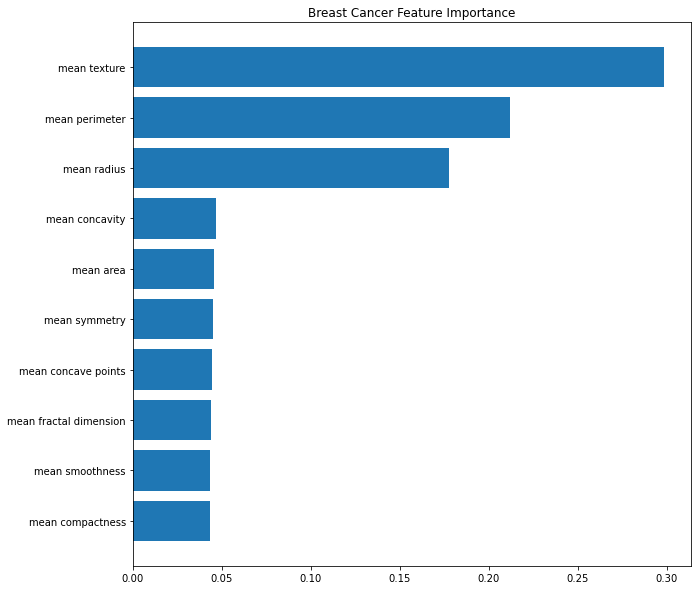

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
idx = np.argsort(forest.feature_importances_)
names=cancer.feature_names[idx]
values = forest.feature_importances_[idx]

plt.figure(figsize=(10,10))
plt.barh(names, values)
plt.title('Breast Cancer Feature Importance')
plt.show()

### 부스팅 방법

부스트(boost) 방법은 미리 정해진 갯수의 모형 집합을 사용하는 것이 아니라 하나으 ㅣ모형에서 시작하여 모형 집합에 포함할 개별 모형을 하나씩 추가한다. 모형의 집합은 위원회(commitee) C라고 하고 m 개의 모형을 포함하는 위원회 $C_m$으로 표시한다. 위원회에서는 개별 모형을 약 분류기 (week classifier)라고 하며 k로 표시한다.